#### Importing useful and required libraries

In [162]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data

In [163]:
import pandas as pd
data=pd.read_csv("C:\\Users\\hp\\Desktop\\Customer_segmentation\\customers.csv")
#df=pd.DataFrame(data)
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [164]:
data.shape

(200, 5)


#### Exploring the data

###### CustomerID:unique Id of each customer

###### Genre:The customers's sex

###### Age:The customers's age in year

###### Annual Income:customers's annual income

###### spending score:It defines customers's spending rate



#### Clean the data

In [165]:
#cheaking whether any duplicate values present or not

In [166]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [127]:
print("duplicate values count:\n\n",data.duplicated().sum())

duplicate values count:

 0


In [128]:
#cheaking whether any null values present or not

In [167]:
data.isnull().head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [168]:
print("Null values count:\n\n",data.isnull().sum())

Null values count:

 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#### visualising null values

<AxesSubplot:>

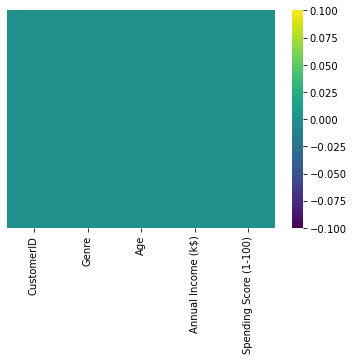

In [169]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

#### outlier remove

In [170]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
108,109,Male,68,63,43
122,123,Female,40,69,58
139,140,Female,35,74,72
45,46,Female,24,39,65
27,28,Male,35,28,61


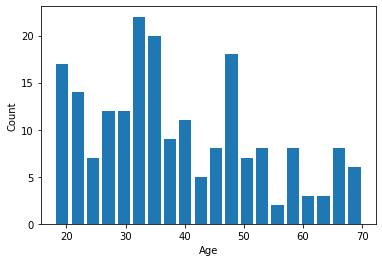

In [171]:
##histogram for visulising 
plt.hist(data.Age, bins=20, rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Plot bell curve along with histogram for our dataset

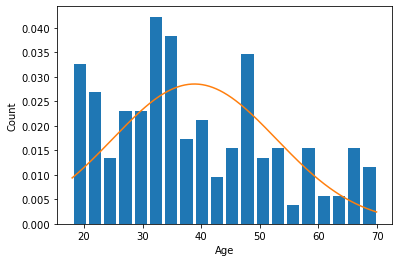

In [172]:
from scipy.stats import norm
plt.hist(data.Age, bins=20, rwidth=0.8, density=True)
plt.xlabel('Age')
plt.ylabel('Count')

rng = np.arange(data.Age.min(), data.Age.max(), 0.1)
plt.plot(rng, norm.pdf(rng,data.Age.mean(),data.Age.std()))

In [173]:
data.Age.mean()

38.85

In [174]:
data.Age.std()

13.969007331558883

#### Outlier detection and removal using 3 standard deviation

 One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [175]:
upper_limit = data.Age.mean() + 3*data.Age.std()
upper_limit

80.75702199467665

In [176]:
lower_limit = data.Age.mean() -3*data.Age.std()
lower_limit

-3.0570219946766457

In [177]:
data[(data.Age>upper_limit) | (data.Age<lower_limit)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)


##### there are no outlier on our dataset



In [178]:
##### if any outlier present then remove these outliers and generate updated dataframe
df = data[(data.Age<upper_limit) & (data.Age>lower_limit)]
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [179]:
df.shape

(200, 5)

In [180]:
data.shape

(200, 5)

Above shows original dataframe data 200 data points. Out of that we do not removed any things because we do not have any outlier

In [181]:
data=df.copy()
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [183]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [184]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [185]:
##taking small number of data from data set for prediction
data.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [186]:
x=data.iloc[:,[3,4]].values #To extract the column annual income and spending score

In [187]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [188]:
y=data["Spending Score (1-100)"]
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

#### Perform elbow method to find optimal no. of clusters

###### Elbow method is fundamental step for any unsupervised algorithms to determine the optimal no. of clusters.

In [189]:
from sklearn.cluster import KMeans
wcss=[]

In [190]:
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


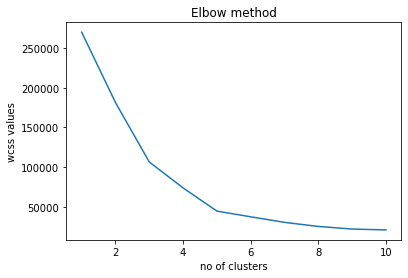

In [191]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("no of clusters")
plt.ylabel("wcss values")
plt.show()

finally from the plot we can say the optimal value of k is 5

##### buildling or training the model

In [192]:
Kmeans_model=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [193]:
y_kmeans=Kmeans_model.fit_predict(x) #x is our data which includes annual income and spending score
#kmean_acc=Kmeans_model.score(x,"Spending Score (1-100)")
#kmean_acc=Kmeans_model.score(x,Kmeans_model)
acc1=np.sum(y_kmeans==y)/len(y)

In [194]:
acc1

0.01

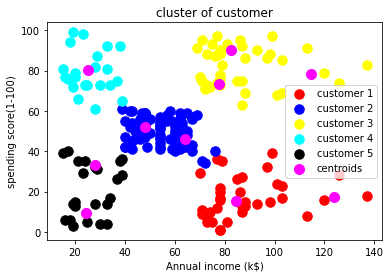

In [195]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=90,c='red',label='customer 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=90,c='blue',label='customer 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=90,c='yellow',label='customer 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=90,c='cyan',label='customer 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=90,c='black',label='customer 5')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=100,c='magenta', label='centroids')
plt.title("cluster of customer")
plt.xlabel("Annual income (k$)")
plt.ylabel("spending score(1-100)")
plt.legend()
plt.show()

###### From the plot we can say
###### top cyan colour cluster customers having less saraly but their spending is quite high
###### red colour cluster customers annual salary is high but their spending is low
###### the targeted customers are blue colours cluster customers .They  having  decent salary and spending is well

### linear regression

In [196]:
#import required library
from sklearn import linear_model

ldata=data[['Age','Spending Score (1-100)']]

In [197]:
ldata

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


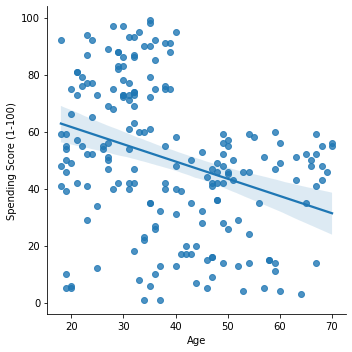

In [198]:
sns.lmplot(x='Age',y='Spending Score (1-100)',data=ldata)

In [199]:
reg=linear_model.LinearRegression()

In [200]:
##train the model
reg.fit(ldata[['Age']],ldata['Spending Score (1-100)'])


LinearRegression()

In [201]:
prediction=reg.predict([[70]])
lr_acc=reg.score(ldata[['Age']],ldata['Spending Score (1-100)'])
print(lr_acc)

0.10707740876869032


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [202]:
prediction


array([31.35670268])

In [203]:
reg.predict([[80]])


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.30749005])

#### standardscaler

In [204]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [205]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [206]:
data1=data.copy()
data1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### converting categorial values to Binary

In [207]:
dummy=pd.get_dummies(data1['Genre'])

In [208]:
dummy.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [209]:
df1=pd.concat((data1,dummy),axis=1)

In [210]:
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [211]:
df1=df1.drop(['Genre'],axis=1)

In [212]:
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [213]:
df1=df1.drop(['Male'],axis=1)

In [214]:
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [215]:
df1=df1.rename(columns={"Female":"Sex"})
df1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Sex
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1
...,...,...,...,...,...
195,196,35,120,79,1
196,197,45,126,28,1
197,198,32,126,74,0
198,199,32,137,18,0


In [216]:
X = df1.drop('Spending Score (1-100)', axis = 1)
X.head()

,CustomerID,Age,Annual Income (k$),Sex
0,1,19,15,0
1,2,21,15,0
2,3,20,16,1
3,4,23,16,1
4,5,31,17,1


In [217]:
y = df1['Spending Score (1-100)']
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print (X_std)

[[-1.7234121  -1.42456879 -1.73899919 -1.12815215]
 [-1.70609137 -1.28103541 -1.73899919 -1.12815215]
 [-1.68877065 -1.3528021  -1.70082976  0.88640526]
 [-1.67144992 -1.13750203 -1.70082976  0.88640526]
 [-1.6541292  -0.56336851 -1.66266033  0.88640526]
 [-1.63680847 -1.20926872 -1.66266033  0.88640526]
 [-1.61948775 -0.27630176 -1.62449091  0.88640526]
 [-1.60216702 -1.13750203 -1.62449091  0.88640526]
 [-1.5848463   1.80493225 -1.58632148 -1.12815215]
 [-1.56752558 -0.6351352  -1.58632148  0.88640526]
 [-1.55020485  2.02023231 -1.58632148 -1.12815215]
 [-1.53288413 -0.27630176 -1.58632148  0.88640526]
 [-1.5155634   1.37433211 -1.54815205  0.88640526]
 [-1.49824268 -1.06573534 -1.54815205  0.88640526]
 [-1.48092195 -0.13276838 -1.54815205 -1.12815215]
 [-1.46360123 -1.20926872 -1.54815205 -1.12815215]
 [-1.4462805  -0.27630176 -1.50998262  0.88640526]
 [-1.42895978 -1.3528021  -1.50998262 -1.12815215]
 [-1.41163905  0.94373197 -1.43364376 -1.12815215]
 [-1.39431833 -0.27630176 -1.43

In [220]:
reg.fit(X_std, y)
print ("Estimated coefficients:", reg.coef_, "and length:", len(reg.coef_))
print ("Intercept:", reg.intercept_)

Estimated coefficients: [-0.29947691 -8.37003934  0.5003864   0.99839047] and length: 4
Intercept: 50.2


In [221]:
predict=reg.coef_*70+(reg.intercept_)

In [222]:
predict

array([  29.2366164 , -535.7027537 ,   85.22704787,  120.0873329 ])

In [223]:
predict=reg.coef_*80+(reg.intercept_)

In [224]:
predict

array([  26.24184731, -619.40314709,   90.23091185,  130.07123761])

#### Logistic Regression

In [225]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [226]:
mldata=data.copy()

In [227]:
mldata

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [228]:
mldata['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [229]:
mldata['Genre'].replace({'Male':'0','Female':'1'},inplace=True)

In [230]:
mldata

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train,X_test,y_train,y_test=train_test_split(mldata[['Age','Annual Income (k$)','Spending Score (1-100)']],mldata['Genre'],test_size=0.2)

In [233]:
len(X_train)

160

In [234]:
len(X_test)

40

In [235]:
#import required model
from sklearn.linear_model import LogisticRegression

In [236]:
lr=LogisticRegression()

In [237]:
##train the model
lr.fit(X_train,y_train)

LogisticRegression()

In [238]:
lr.predict(X_test)

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1'], dtype=object)

In [239]:
acc_lr=lr.score(X_test,y_test)
acc_lr

0.525

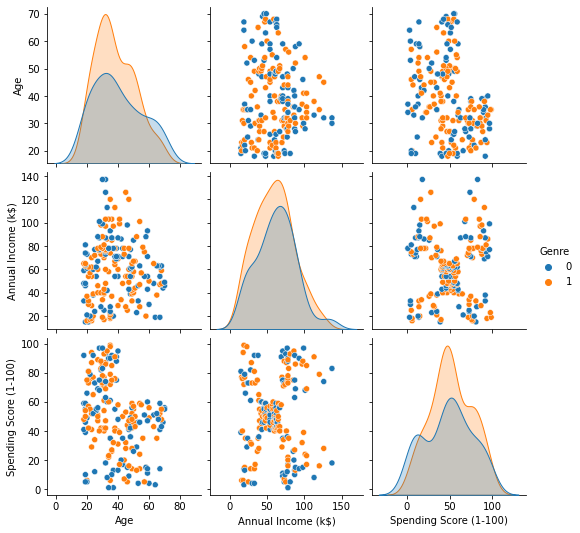

In [240]:
sns.pairplot(mldata[['Genre','Age','Annual Income (k$)','Spending Score (1-100)']],hue='Genre')

In [241]:
y_predicted=lr.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 0, 19],
       [ 0, 21]], dtype=int64)

Text(69.0, 0.5, 'Truth')

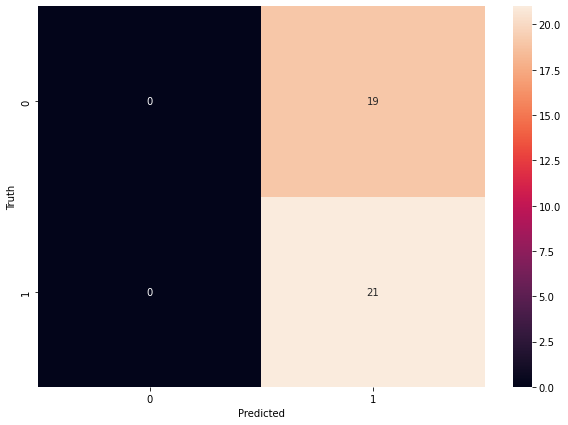

In [242]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

#### decision tree

In [244]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [245]:
dt=data.copy()
dt

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [246]:
## convert catagorical to non-catagorical
dt['Genre'].replace({'Male':'0','Female':'1'},inplace=True)
dt

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [247]:
inputs=dt.drop(columns=['Spending Score (1-100)'])
inputs

,CustomerID,Genre,Age,Annual Income (k$)
0,1,0,19,15
1,2,0,21,15
2,3,1,20,16
3,4,1,23,16
4,5,1,31,17
...,...,...,...,...
195,196,1,35,120
196,197,1,45,126
197,198,0,32,126
198,199,0,32,137


In [248]:
target=dt['Spending Score (1-100)']
target

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [249]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [250]:
## train the model
model.fit(inputs,target)

DecisionTreeClassifier()

In [251]:
dc_acc=model.score(inputs,target)

In [252]:
dc_acc

1.0

In [253]:
model.predict([[101,1,26,70]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([41], dtype=int64)

#### accuracy check

In [254]:
print("Accuracy of k-mean:",acc1)
print("Accuracy of linear Regression:",lr_acc)
print("Accuracy of Logistic Regression:",acc_lr)
print("Accuracy of decison tree:",dc_acc)

Accuracy of k-mean: 0.01
Accuracy of linear Regression: 0.10707740876869032
Accuracy of Logistic Regression: 0.525
Accuracy of decison tree: 1.0


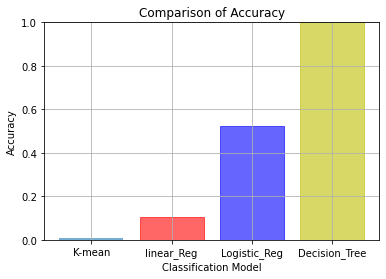

In [255]:
models=["K-mean", "linear_Reg",  "Logistic_Reg",  "Decision_Tree"]
accuracies=[acc1,lr_acc,acc_lr,dc_acc]
barlist=plt.bar(models,accuracies,width=0.8,alpha=0.6)
plt.ylim(0,1.0)
barlist[1].set_color('r')
barlist[2].set_color('b')
barlist[3].set_color('y')
plt.xlabel("Classification Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy")
plt.grid()
plt.show()
#plt.savefig('accu_models.png')
